In [1]:
import pandas as pd
import numpy as np

In [3]:
from fbprophet import Prophet
from pandas import DataFrame
from pandas import to_datetime
from matplotlib import pyplot
%matplotlib inline

In [5]:
df = pd.read_csv('airline_passengers.csv')

In [6]:
df

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,NaN,NaN


In [7]:
df.isnull().sum()

Month                      1
Thousands of Passengers    2
dtype: int64

In [9]:
df = df.dropna()
df

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0


In [10]:
df.columns = ['ds','y']
df

,ds,y
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      144 non-null    object 
 1   y       144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


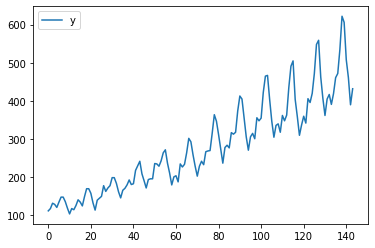

In [12]:
df.plot()

In [13]:
df['ds'] = pd.to_datetime(df['ds'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
df

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0
...,...,...
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      144 non-null    datetime64[ns]
 1   y       144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [16]:
model = Prophet()

In [17]:
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [24]:
Future = list()
for i in range(1,13):
  date = '1960-%02d'%i
  print(date)
  Future.append([date])
Future = DataFrame(Future)
Future.columns = ['ds']
Future['ds'] = to_datetime(Future['ds'])
Future

1960-01
1960-02
1960-03
1960-04
1960-05
1960-06
1960-07
1960-08
1960-09
1960-10
1960-11
1960-12


,ds
0,1960-01-01
1,1960-02-01
2,1960-03-01
3,1960-04-01
4,1960-05-01
5,1960-06-01
6,1960-07-01
7,1960-08-01
8,1960-09-01
9,1960-10-01


In [25]:
forecast = model.predict(Future)           # Predicted values of y for ds values in Future

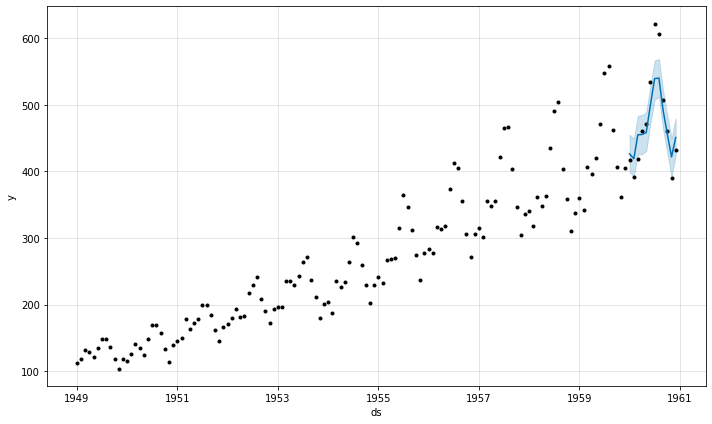

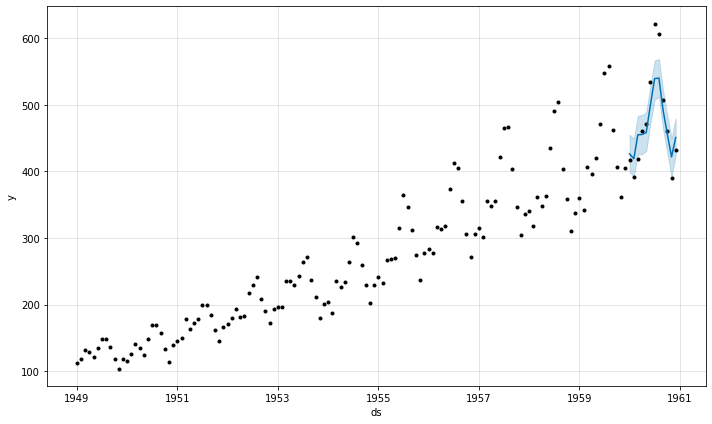

In [26]:
model.plot(forecast)

In [27]:
print(forecast[['ds','yhat','yhat_lower','yhat_upper']])

           ds        yhat  yhat_lower  yhat_upper
0  1960-01-01  426.243193  398.654340  455.259946
1  1960-02-01  419.254592  392.797976  448.991795
2  1960-03-01  455.016543  425.326000  483.673362
3  1960-04-01  455.569231  425.820539  484.777746
4  1960-05-01  458.439780  430.633118  488.937024
5  1960-06-01  500.622745  473.076467  530.031703
6  1960-07-01  539.395677  507.573512  566.534318
7  1960-08-01  540.310782  512.143381  568.897530
8  1960-09-01  491.351975  462.529635  520.906152
9  1960-10-01  456.527977  427.733262  484.464134
10 1960-11-01  421.786317  391.645939  449.730253
11 1960-12-01  450.943293  424.092684  480.031382


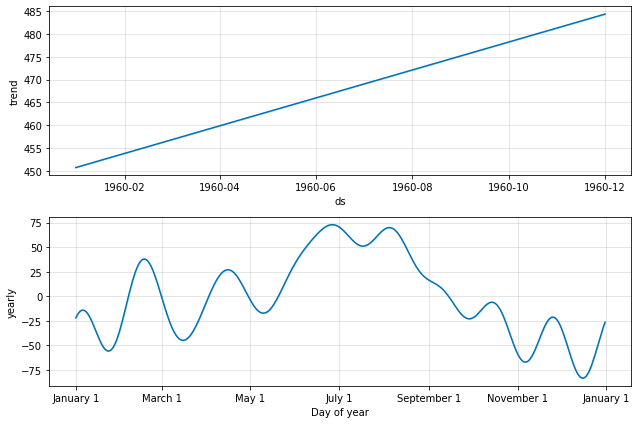

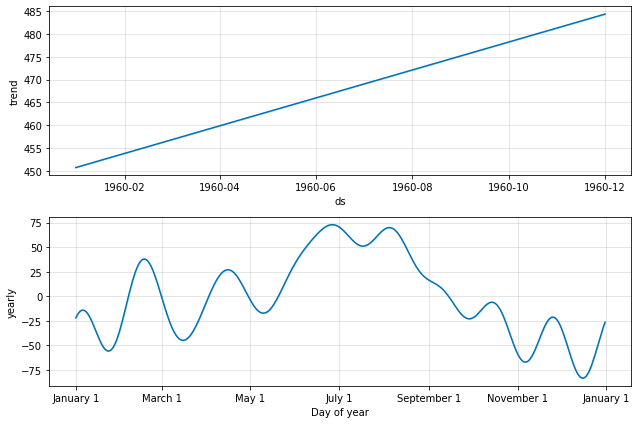

In [28]:
model.plot_components(forecast)